# CNC 1-1

## 1. Install Library

In [ ]:
!pip install pycaret --ignore-installed llvmlite

In [ ]:
!pip install pycaret

In [ ]:
# !pip3 install numpy --upgrade

## 2. Load Library

In [28]:
import pycaret
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

## 3. Load Data

In [29]:
df_train = pd.read_csv('data/train_new_tukeyfence_exp.csv',sep = ',', encoding='cp949')
df_test = pd.read_csv('data/test_columns.csv',sep = ',', encoding='cp949')

## 4. Data preprocessing

### 1) Target(mean) Encoding

In [31]:
mt_mean = df_train.groupby('X5')['Y1'].mean()
ct_mean = df_train.groupby('X5')['Y2'].mean()

In [32]:
mtmachine_mean = df_train.groupby('X8')['Y1'].mean()
ctmachine_mean = df_train.groupby('X8')['Y2'].mean()

In [33]:
df_train['X5_mt'] = df_train['X5'].map(mt_mean)
df_train['X5_ct'] = df_train['X5'].map(ct_mean)

In [34]:
df_train['X8_mt'] = df_train['X8'].map(mtmachine_mean)
df_train['X8_ct'] = df_train['X8'].map(ctmachine_mean)

In [35]:
df_test = df_test.drop(columns=['Id'])
df_test['X5_mt'] = df_test['X5'].map(mt_mean)
df_test['X5_ct'] = df_test['X5'].map(ct_mean)

In [36]:
df_test['X8_mt'] = df_test['X8'].map(mtmachine_mean)
df_test['X8_ct'] = df_test['X8'].map(ctmachine_mean)

### 2) Marking Time feature extraction

In [ ]:
df_mttrain = df_train[['X2','X3','X8','Y1']]
# df_mttrain = df_mttrain.astype('float')
df_mttrain.info()

In [ ]:
idx = df_mttrain[df_mttrain['Y1'] == 0].index
df_mttrain.drop(idx , inplace=True)

In [ ]:
df_mttest = df_test[['X2','X3','X8']]
df_mttest.info()

### 3) DBSCAN 

#### MinMax scaling

In [41]:
scaler = MinMaxScaler()
df_mtscale = df_mttrain.copy()
df_mtscale[['X2','X3','Y1']]= scaler.fit_transform(df_mttrain[['X2','X3','Y1']])

#### Anomaly Detection

군집별 개수: 
  0    114789
-1       135
 1        15
 2        10
 3         6
dtype: int64


(0.0, 1.0)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

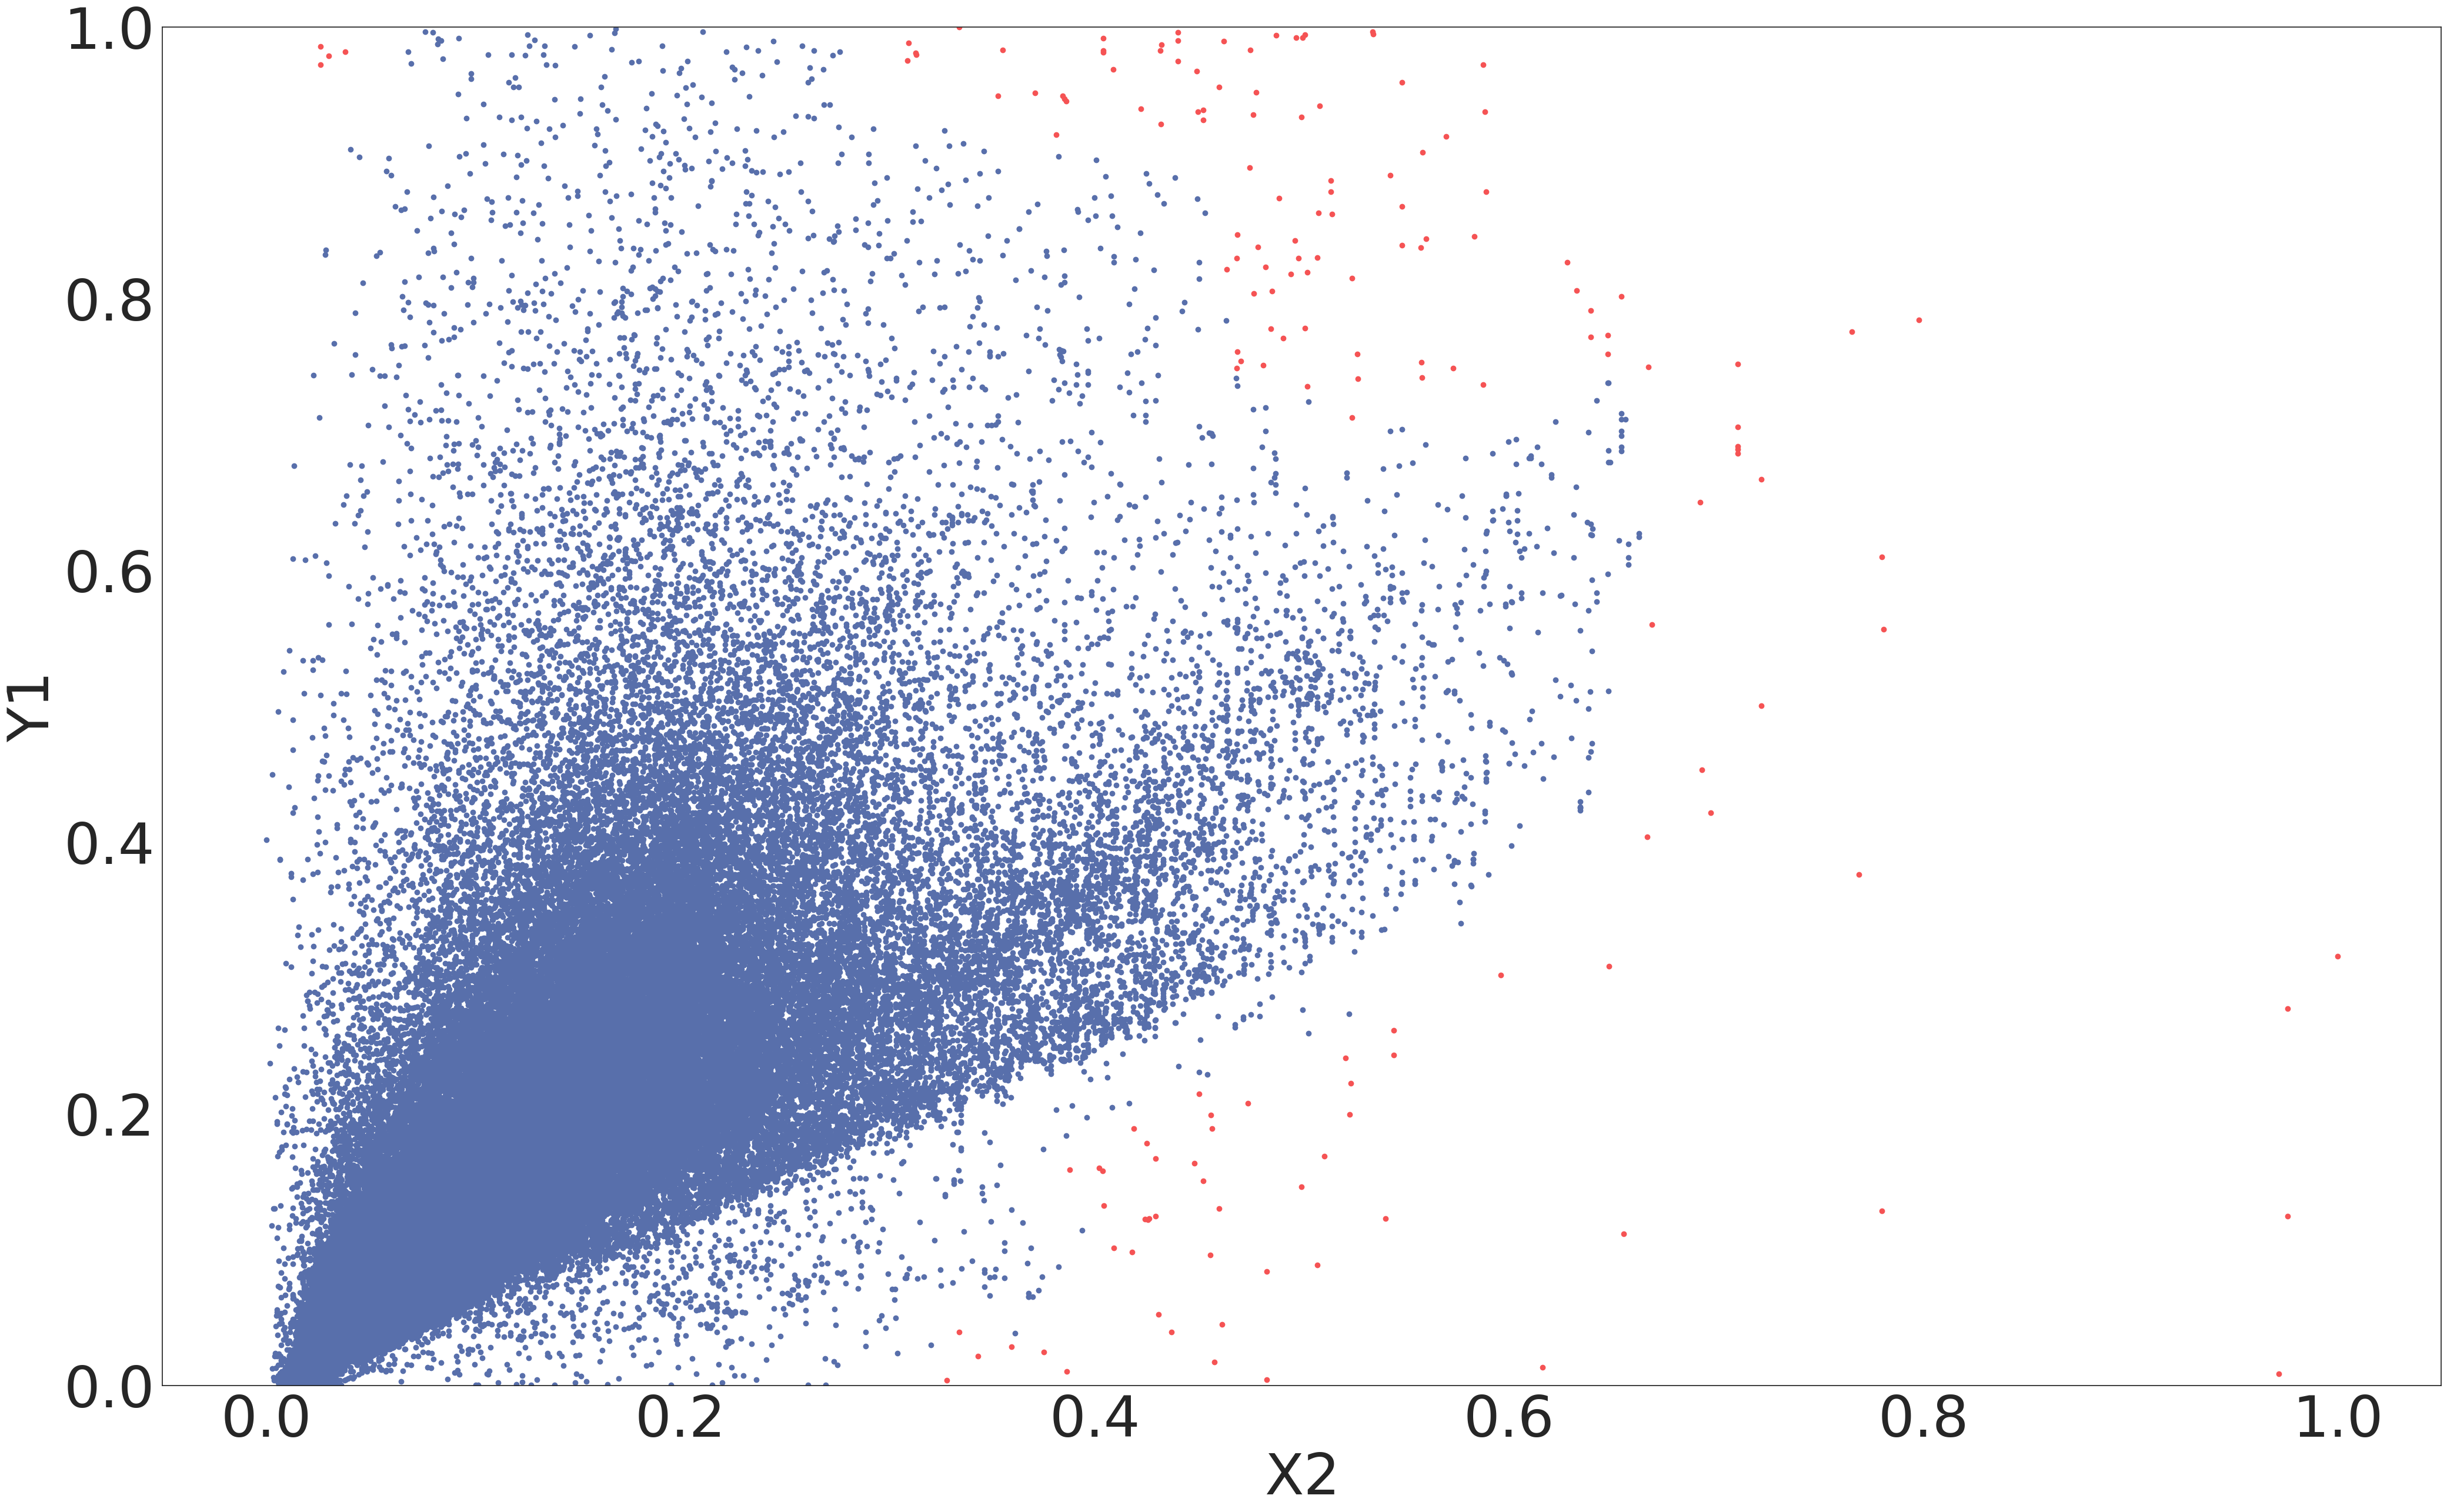

In [42]:
X2 = df_mtscale[['X2','Y1']].values
dbscan = DBSCAN(eps=0.03, min_samples=10).fit(X2)
df_mtscale['clusterX2'] = dbscan.fit_predict(df_mtscale[['X2','Y1']])
labels = dbscan.labels_
print('군집별 개수: \n', pd.Series(labels).value_counts())
unique_labels = set(labels)
plt.figure(figsize=(50, 30))
plt.rc('axes', labelsize=70)
plt.rc('xtick', labelsize=70)
plt.rc('ytick', labelsize=70)
colors = ['#586fab', '#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354',]
for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X2[:,0][sample_mask], X2[:, 1][sample_mask], 'o', color=color)

plt.xlabel('X2')
plt.ylabel('Y1')
plt.ylim([0, 1])

In [43]:
idx_X2 = df_mtscale[df_mtscale['clusterX2'] == -1].index
# df_mttrain.drop(idx_X2 , inplace=True)
idx_X2.append(df_mtscale[df_mtscale['clusterX2'] == 1].index)
# df_mttrain.drop(idx_X2 , inplace=True)
idx_X2.append(df_mtscale[df_mtscale['clusterX2'] == 2].index)
# df_mttrain.drop(idx_X2 , inplace=True)
idx_X2.append(df_mtscale[df_mtscale['clusterX2'] == 3].index)
# df_mttrain.drop(idx_X2 , inplace=True)

# idx = df_mtscale[df_mtscale['cluster'] == 6].index
# df_mttrain.drop(idx , inplace=True)

Int64Index([  3317,   3380,   5203,   7303,   7975,   9260,   9683,  11092,
             11713,  11878,
            ...
            112201, 112394, 113475, 113791,  40312,  60284,  68607,  86427,
             92597, 108789],
           dtype='int64', length=141)

군집별 개수: 
  0    114735
-1       188
 1        12
 3        11
 2         9
dtype: int64


(0.0, 1.0)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

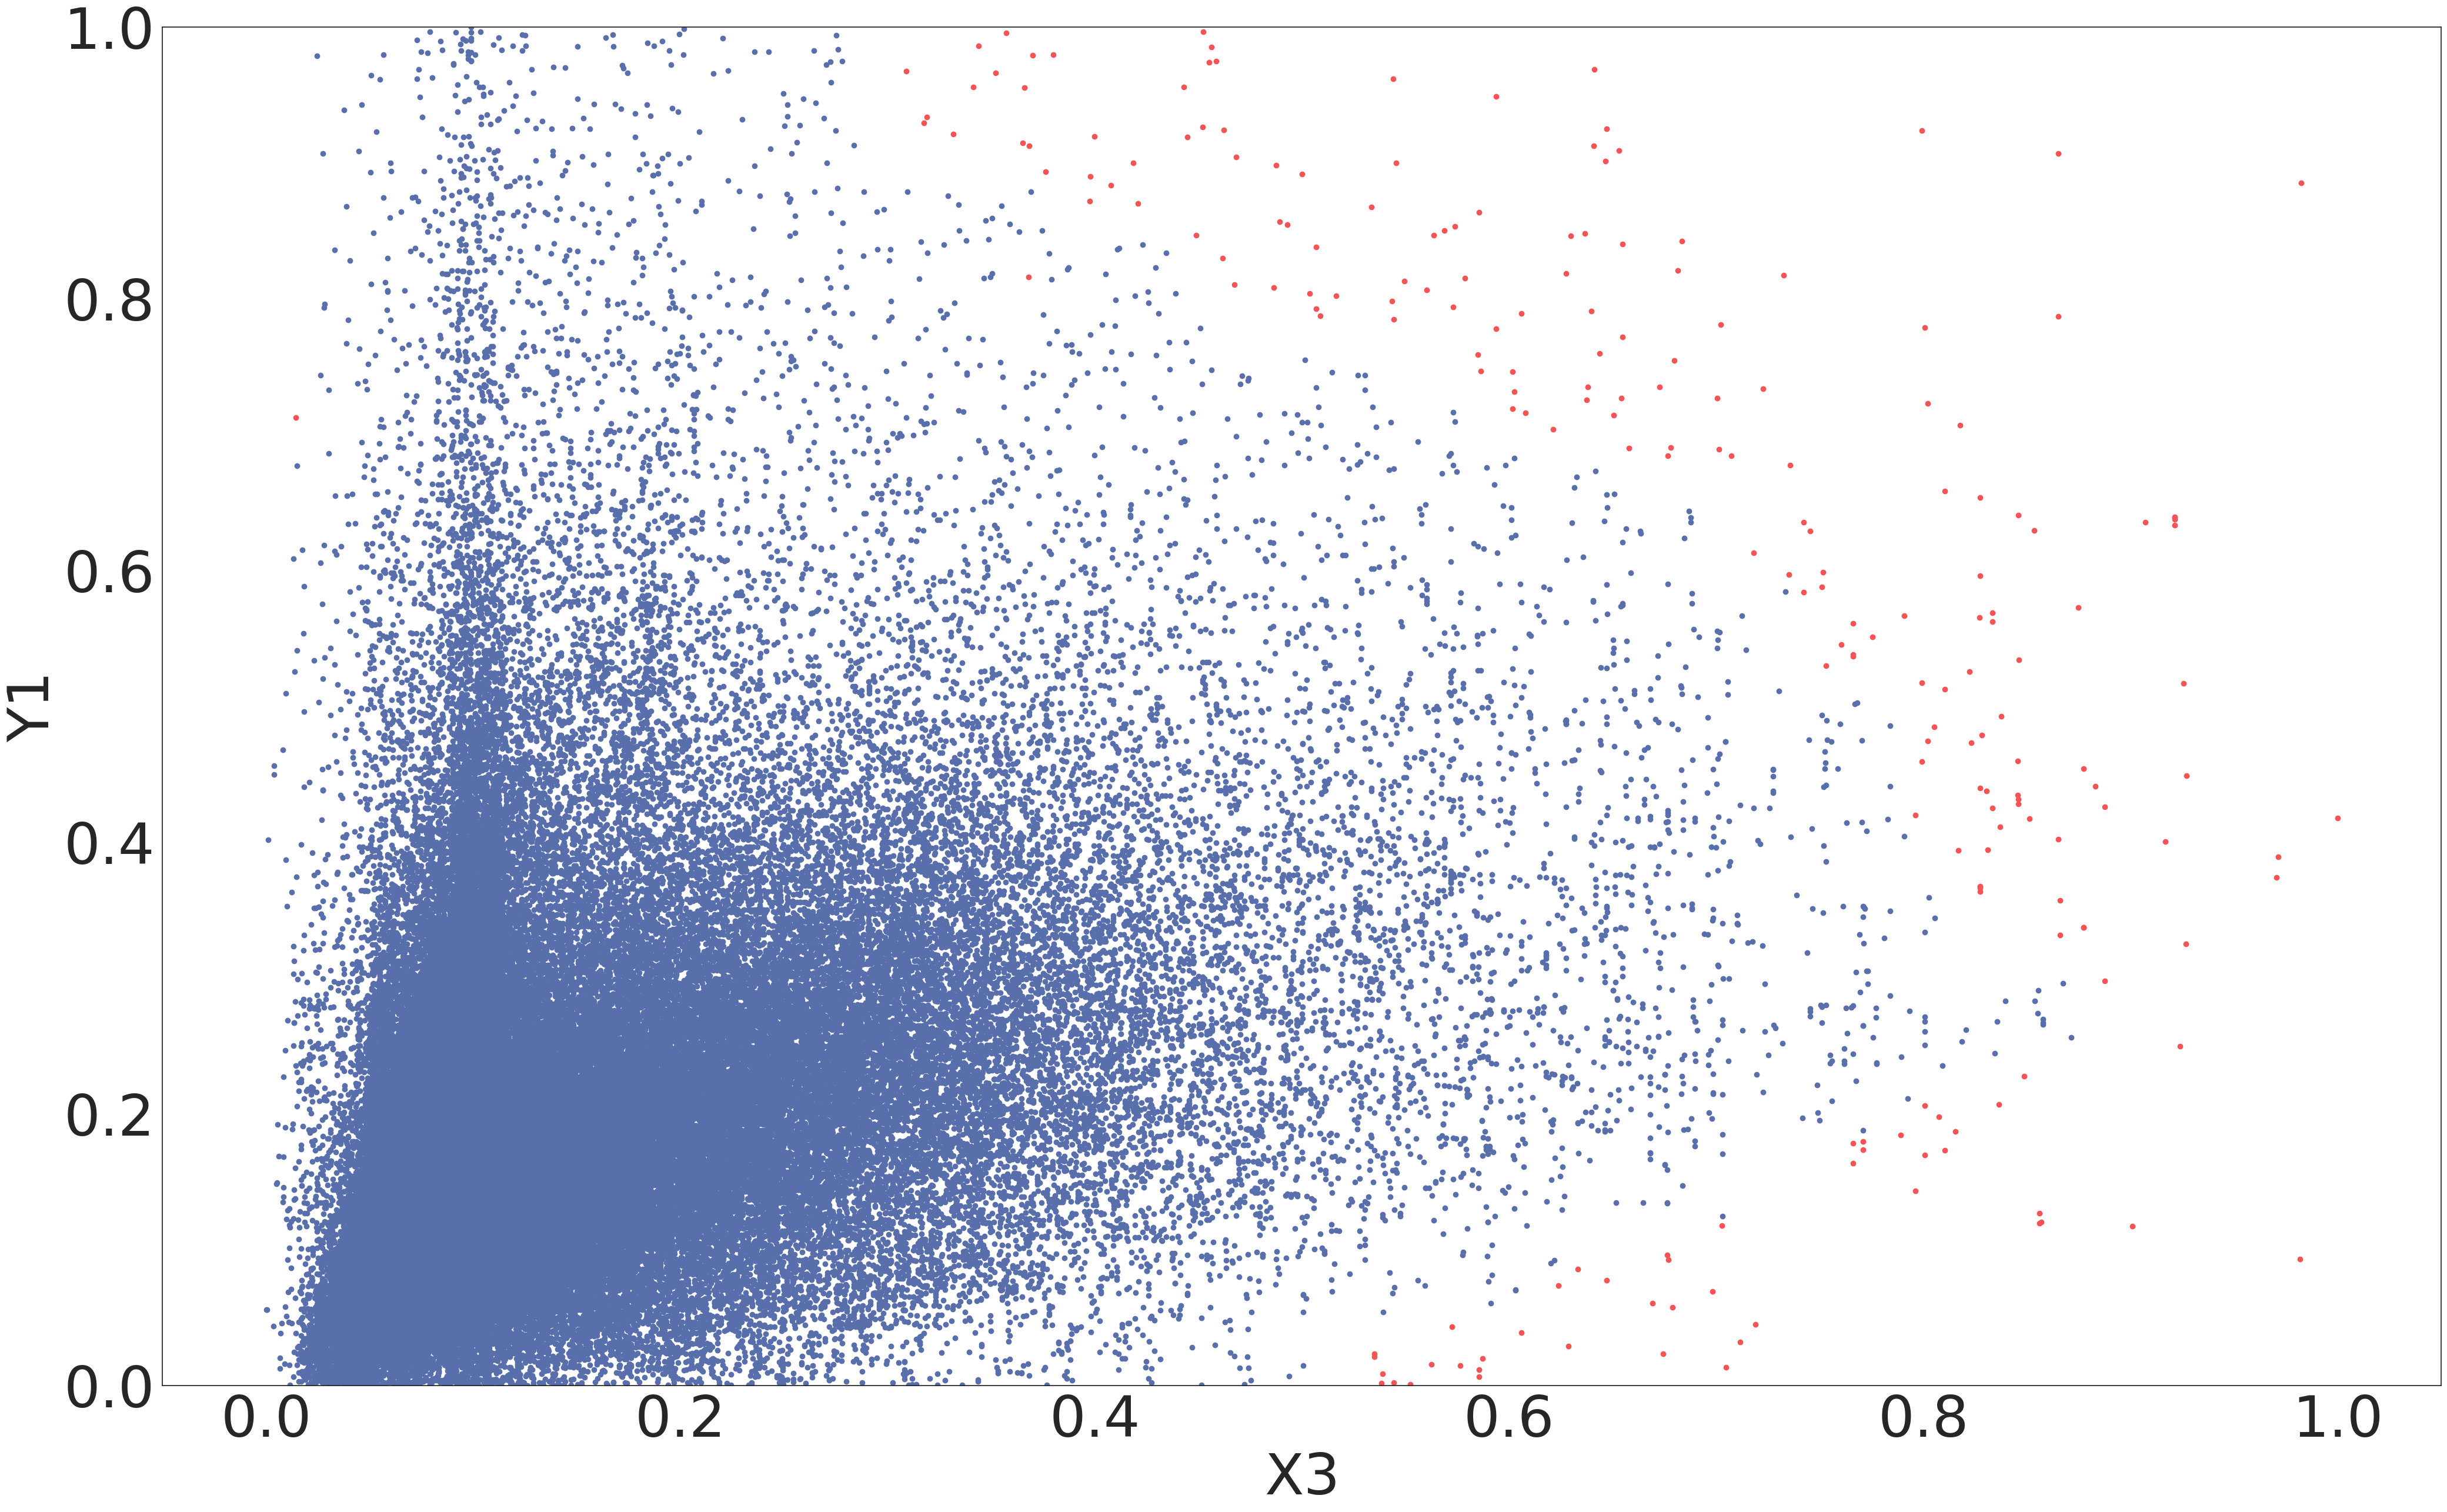

In [44]:
X3 = df_mtscale[['X3','Y1']].values
dbscan = DBSCAN(eps=0.03, min_samples=10).fit(X3)
df_mtscale['clusterX3'] = dbscan.fit_predict(df_mtscale[['X3','Y1']])
labels = dbscan.labels_
print('군집별 개수: \n', pd.Series(labels).value_counts())
unique_labels = set(labels)
plt.figure(figsize=(50, 30))
plt.rc('axes', labelsize=70)
plt.rc('xtick', labelsize=70)
plt.rc('ytick', labelsize=70)
colors = ['#586fab', '#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354','#f55354',]
for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X3[:,0][sample_mask], X3[:, 1][sample_mask], 'o', color=color)

plt.xlabel('X3')
plt.ylabel('Y1')
plt.ylim([0, 1])

In [45]:
idx_X3 = df_mtscale[df_mtscale['clusterX3'] == -1].index
# df_mttrain.drop(idx_X2 , inplace=True)
idx_X3.append(df_mtscale[df_mtscale['clusterX3'] == 1].index)
# df_mttrain.drop(idx_X2 , inplace=True)
idx_X3.append(df_mtscale[df_mtscale['clusterX3'] == 2].index)
# df_mttrain.drop(idx_X2 , inplace=True)
idx_X3.append(df_mtscale[df_mtscale['clusterX3'] == 3].index)
# df_mttrain.drop(idx_X2 , inplace=True)

# idx = df_mtscale[df_mtscale['cluster'] == 6].index
# df_mttrain.drop(idx , inplace=True)

Int64Index([   434,    822,   1052,   3304,   3393,   3729,   4501,   5036,
              5490,   5599,
            ...
             33907,  36477,  38056,  42787,  46819,  93219,  95045,  96962,
            106063, 109599],
           dtype='int64', length=199)

In [47]:
idx = idx_X2.append(idx_X3)
idx = set(idx)
df_mttrain.drop(idx , inplace=True)

/tmp/ipykernel_1697139/1581953853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mttrain.drop(idx , inplace=True)


### 3) Cutting Time feature extraction

In [ ]:
df_cttrain = df_train[['X3','X4','X5', 'X5_ct','X8_ct','Y2']]
# df_mttrain = df_mttrain.astype('float')
df_cttrain.info()

In [49]:
# df_cttrain['X7'] = df_cttrain['X7'].replace(14, 1)
# df_cttrain['X7'] = df_cttrain['X7'].replace(92,2)
# df_cttrain['X7'] = df_cttrain['X7'].replace(27,3)
# df_cttrain['X7'] = df_cttrain['X7'].replace(97,4)
# df_cttrain['X7'] = df_cttrain['X7'].replace([23,22],5)
# df_cttrain['X7'] = df_cttrain['X7'].replace([96,21,24,26],6)
# df_cttrain['X7'] = df_cttrain['X7'].replace([25,91],7)

In [ ]:
idx = df_cttrain[df_cttrain['Y2'] == 0].index
df_cttrain.drop(idx , inplace=True)

In [ ]:
df_cttest = df_test[['X3','X4', 'X5_ct','X6', 'X8_ct']]
# df_mttrain = df_mttrain.astype('float')
df_cttest.info()

### 3) DBSCAN 

#### MinMax scaling

In [52]:
# df_cttest['X7'] = df_cttest['X7'].replace(14, 1)
# df_cttest['X7'] = df_cttest['X7'].replace(92,2)
# df_cttest['X7'] = df_cttest['X7'].replace(27,3)
# df_cttest['X7'] = df_cttest['X7'].replace(97,4)
# df_cttest['X7'] = df_cttest['X7'].replace([23,22],5)
# df_cttest['X7'] = df_cttest['X7'].replace([96,21,24,26],6)
# df_cttest['X7'] = df_cttest['X7'].replace([25,91],7)

In [53]:
scaler = MinMaxScaler()
df_ctscale = df_cttrain.copy()
df_ctscale[['X3','Y2']]= scaler.fit_transform(df_cttrain[['X3','Y2']])

#### Anomaly Detection

군집별 개수: 
  0    114280
-1       675
dtype: int64


Text(0, 0.5, 'Y2')

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

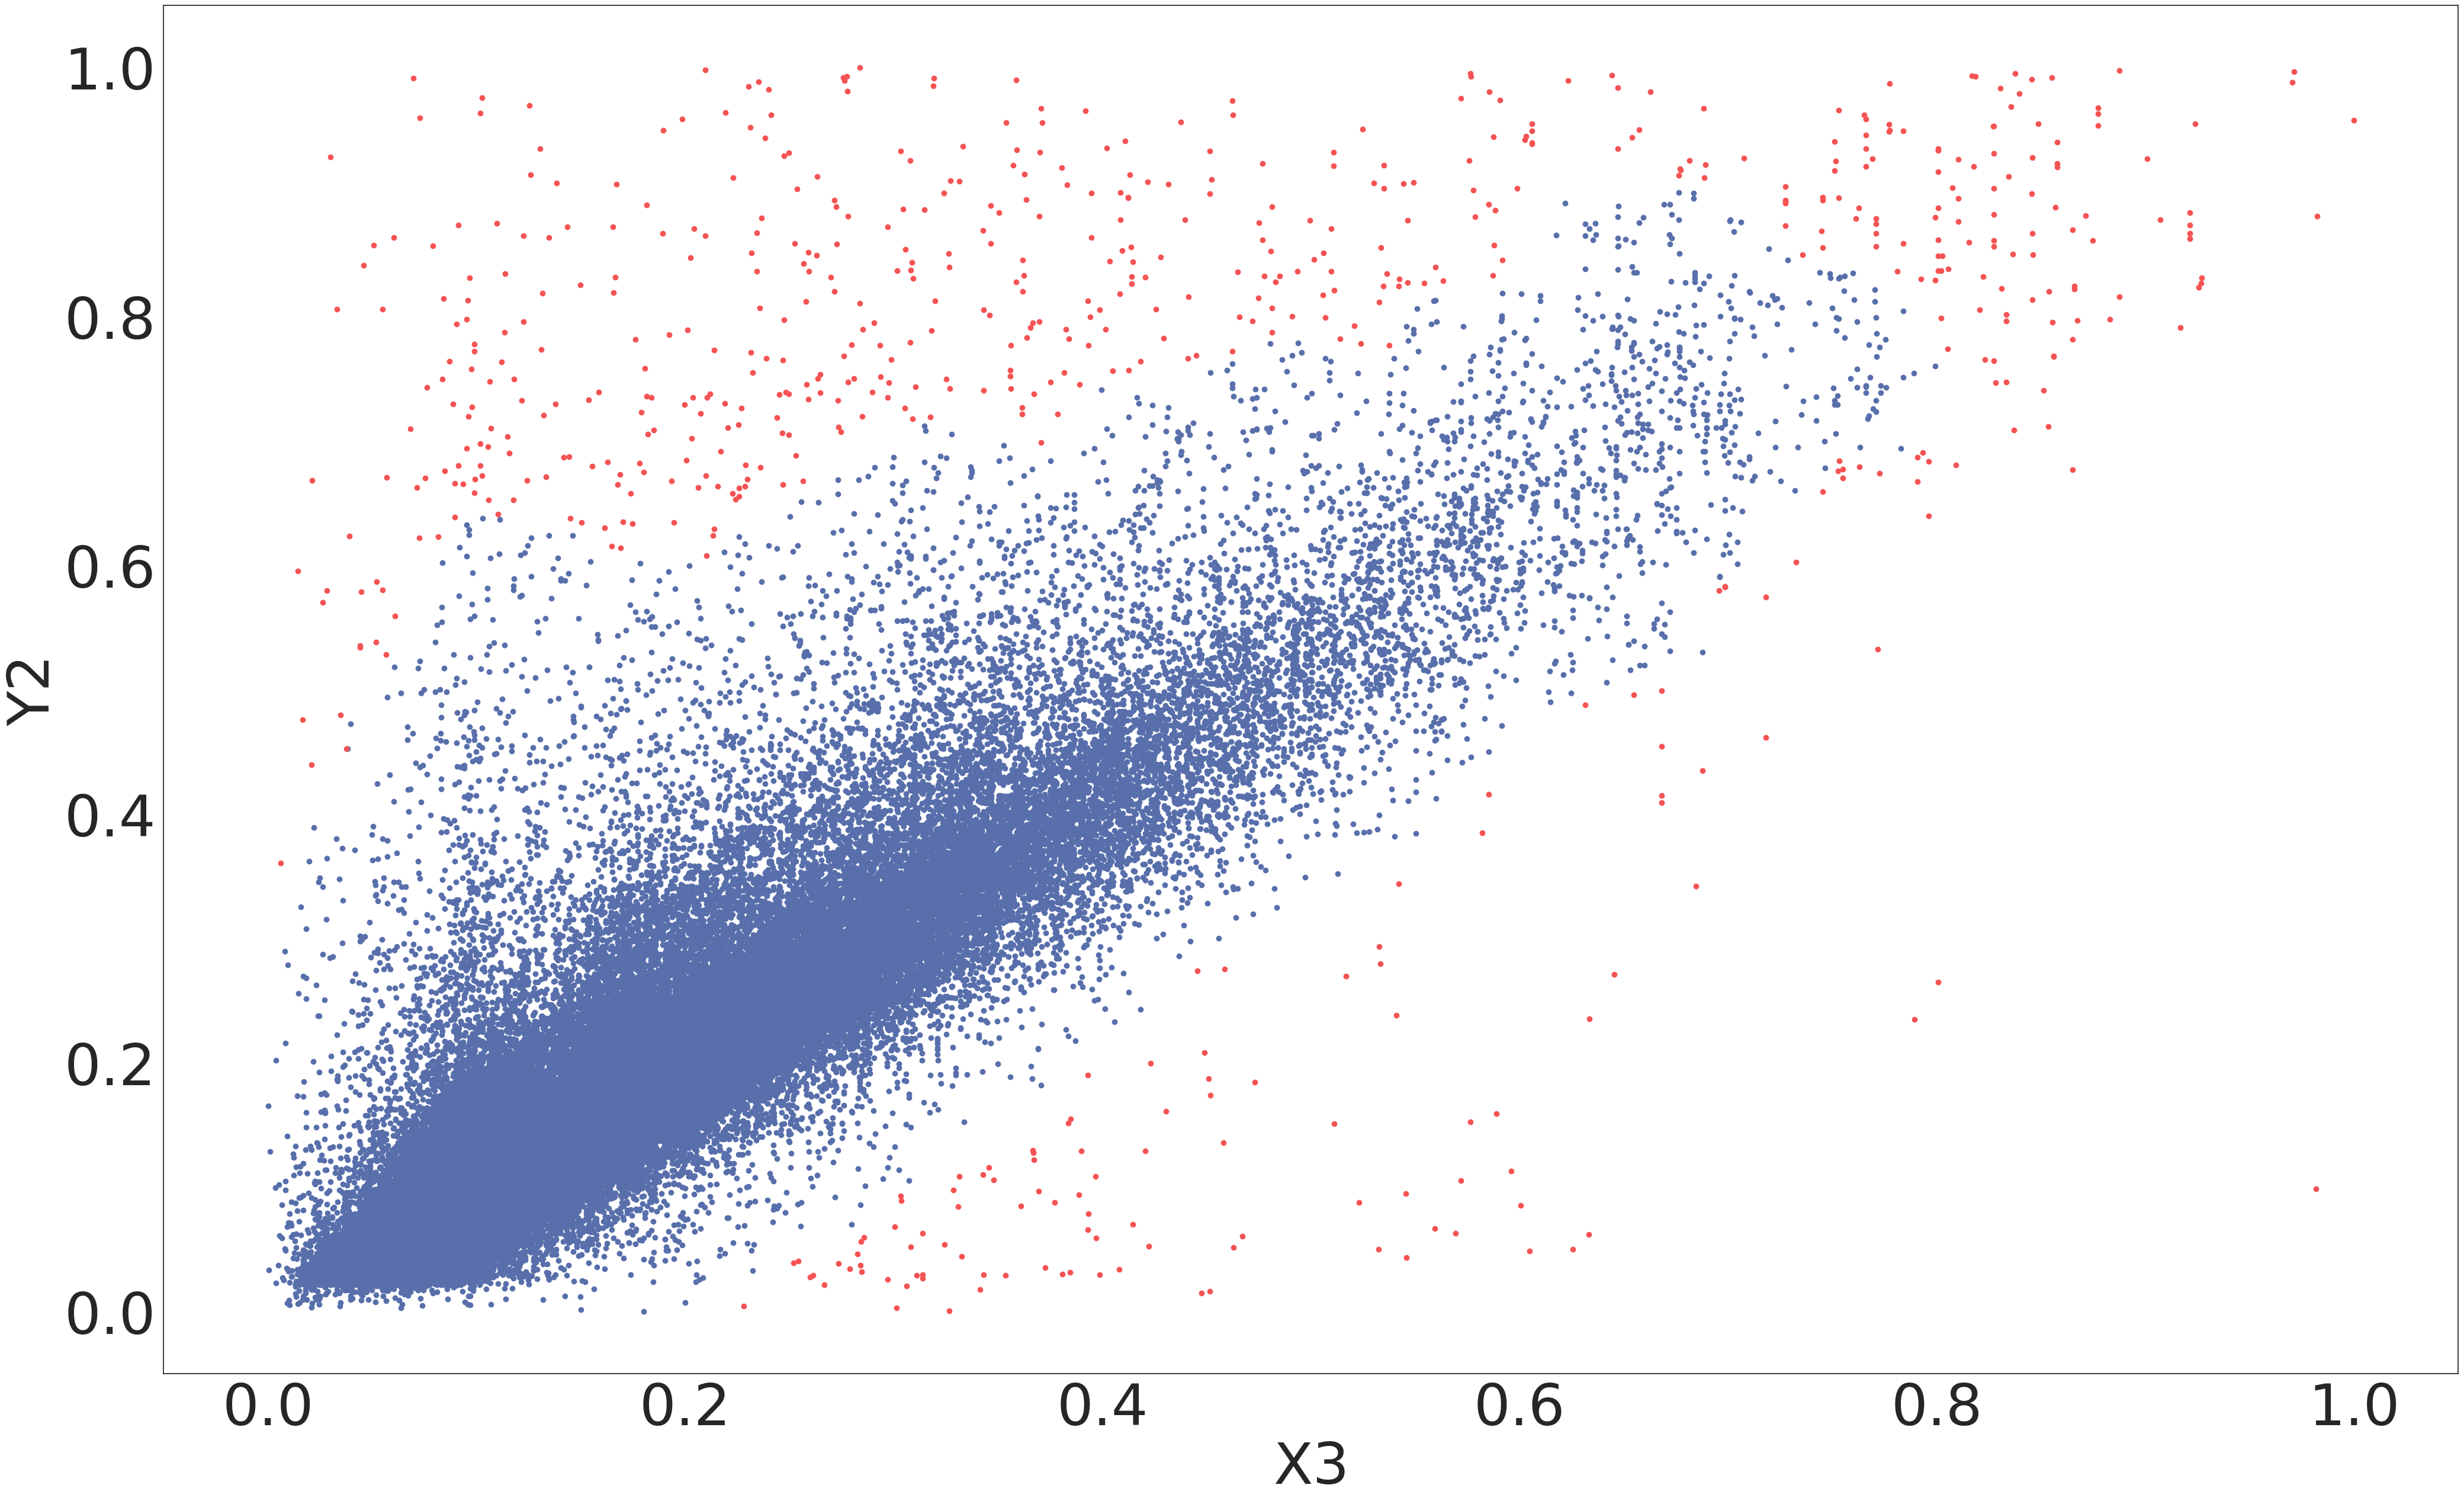

In [54]:
X= df_ctscale[['X3','Y2']].values
dbscan = DBSCAN(eps=0.03, min_samples=20).fit(X)
df_ctscale['cluster'] = dbscan.fit_predict(df_ctscale[['X3','Y2']])
labels = dbscan.labels_
print('군집별 개수: \n', pd.Series(labels).value_counts())
unique_labels = set(labels)
plt.figure(figsize=(50, 30))
plt.rc('axes', labelsize=70)
plt.rc('xtick', labelsize=70)
plt.rc('ytick', labelsize=70)
colors = ['#586fab', '#f55354', '#f55354', '#f55354','#f55354','#f55354','#f55354','#f55354',]
for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color)

plt.xlabel('X3')
plt.ylabel('Y2')
# plt.ylim([0, 10])

In [55]:
idx = df_ctscale[df_ctscale['cluster'] == -1].index
df_cttrain.drop(idx , inplace=True)
idx = df_ctscale[df_ctscale['cluster'] == 1].index
df_cttrain.drop(idx , inplace=True)
# idx = df_ctscale[df_ctscale['cluster'] == 2].index
# df_cttrain.drop(idx , inplace=True)
# idx = df_ctscale[df_ctscale['cluster'] == 3].index
# df_cttrain.drop(idx , inplace=True)
# idx = df_ctscale[df_ctscale['cluster'] == 4].index
# df_cttrain.drop(idx , inplace=True)
# idx = df_ctscale[df_ctscale['cluster'] == 5].index
# df_cttrain.drop(idx , inplace=True)
# idx = df_ctscale[df_ctscale['cluster'] == 6].index
# df_cttrain.drop(idx , inplace=True)

/tmp/ipykernel_1697139/78712196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cttrain.drop(idx , inplace=True)
/tmp/ipykernel_1697139/78712196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cttrain.drop(idx , inplace=True)


## 5. Model

In [56]:
# pip show numpy

In [57]:
# !pip install numba==0.53

### 2) Marking Time

#### Train

In [58]:
from pycaret.regression import *

mtreg = setup(data=df_mttrain, target='Y1', train_size=0.7, session_id=10, normalize=True, normalize_method='zscore', use_gpu=True, numeric_features=['X2','X3'], categorical_features=['X8'])

,Description,Value
0,session_id,10
1,Target,Y1
2,Original Data,"(114633, 4)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(80243, 31)"


In [59]:
models()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [60]:
mt_best3model = compare_models(sort='mae', n_select=3, fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,84.7282,21593.0771,146.9251,0.6472,0.2726,0.2008,0.2360
xgboost,Extreme Gradient Boosting,85.2966,21976.9645,148.2246,0.6409,0.2753,0.2011,0.5000
rf,Random Forest Regressor,87.2975,24115.8872,155.2693,0.6059,0.2872,0.2034,4.2620
gbr,Gradient Boosting Regressor,89.0779,22882.9690,151.2532,0.6261,0.2863,0.2193,4.0540
huber,Huber Regressor,89.8146,25097.1930,158.4074,0.5899,0.2983,0.2071,0.7460
par,Passive Aggressive Regressor,90.4127,25516.5006,159.7185,0.5830,0.3039,0.2060,0.1500
et,Extra Trees Regressor,90.9677,26898.6807,163.9878,0.5604,0.3017,0.2109,5.5540
knn,K Neighbors Regressor,92.2813,25072.2008,158.3247,0.5903,0.2972,0.2159,1.9620
br,Bayesian Ridge,94.0953,24037.6308,155.0218,0.6072,0.3063,0.2356,0.0800
ridge,Ridge Regression,94.1032,24037.6375,155.0218,0.6072,0.3063,0.2356,0.0280


In [61]:
mt_best3model

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min

In [62]:
mt_best = mt_best3model[0]
mt_tuned_best = tune_model(mt_best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,82.8549,20412.5511,142.8725,0.6633,0.2672,0.1960
1,85.4856,22394.7816,149.6489,0.6365,0.2745,0.1993
2,88.0866,24810.8879,157.5147,0.6109,0.2856,0.2067
3,84.7495,21396.7718,146.2764,0.6443,0.2747,0.2018
4,85.1004,22167.9183,148.8889,0.6394,0.2725,0.1977
5,82.2830,19476.3321,139.5576,0.6690,0.2671,0.1985
6,87.8555,23950.3481,154.7590,0.6348,0.2802,0.2048
7,83.3350,20145.4048,141.9345,0.6498,0.2744,0.2034
8,86.5009,21653.6794,147.1519,0.6469,0.2795,0.2052


In [63]:
mt_second = mt_best3model[1]
mt_tuned_second = tune_model(mt_second)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,83.3952,20593.9395,143.5059,0.6603,0.2684,0.1981
1,85.8547,22537.1680,150.1238,0.6342,0.2771,0.2012
2,87.8545,24537.0527,156.6431,0.6152,0.2840,0.2069
3,84.8729,21451.7754,146.4642,0.6434,0.2756,0.2022
4,85.2694,22194.2285,148.9773,0.6390,0.2726,0.1980
5,82.6030,19533.0781,139.7608,0.6681,0.2664,0.1987
6,88.9848,24272.2402,155.7955,0.6299,0.2818,0.2067
7,83.8009,20565.9824,143.4084,0.6425,0.2774,0.2052
8,86.6086,21807.1289,147.6724,0.6444,0.2793,0.2050


In [64]:
# mt_third = mt_best3model[2]
# mt_tuned_third = tune_model(mt_third)

In [65]:
mt_ensemble_best = ensemble_model(mt_best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,82.3468,20209.4105,142.1598,0.6666,0.2648,0.1960
1,84.9904,22300.9790,149.3351,0.6380,0.2736,0.1996
2,87.3582,24340.4014,156.0141,0.6183,0.2825,0.2065
3,84.1681,21162.1564,145.4722,0.6482,0.2729,0.2014
4,84.6293,22043.4827,148.4705,0.6415,0.2702,0.1972
5,81.9161,19410.3183,139.3209,0.6701,0.2639,0.1981
6,87.4376,23848.2440,154.4288,0.6364,0.2767,0.2041
7,82.5707,20034.8347,141.5445,0.6517,0.2726,0.2026
8,85.6520,21491.2919,146.5991,0.6495,0.2756,0.2028


In [66]:
mt_ensemble_second = ensemble_model(mt_second)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,81.7202,20146.5840,141.9387,0.6677,0.2643,0.1936
1,84.5999,22271.7402,149.2372,0.6385,0.2730,0.1970
2,86.9263,24449.9668,156.3649,0.6165,0.2823,0.2038
3,84.1133,21350.4688,146.1180,0.6451,0.2738,0.2002
4,84.2413,22048.8301,148.4885,0.6414,0.2701,0.1950
5,81.6596,19351.5059,139.1097,0.6711,0.2643,0.1965
6,87.2270,23819.4609,154.3355,0.6368,0.2760,0.2015
7,82.5017,20160.9727,141.9893,0.6495,0.2726,0.2003
8,85.3379,21527.8613,146.7238,0.6489,0.2762,0.2015


In [67]:
mt_blender_model = blend_models(estimator_list=mt_best3model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,80.5281,19971.2179,141.3196,0.6706,0.2612,0.1903
1,83.5220,22147.7797,148.8213,0.6405,0.2699,0.1935
2,86.2007,24403.1899,156.2152,0.6173,0.2807,0.2018
3,83.1630,21258.9939,145.8046,0.6466,0.2721,0.1969
4,83.1574,21852.3464,147.8254,0.6446,0.2687,0.1927
5,80.7983,19350.7987,139.1071,0.6711,0.2632,0.1944
6,86.2148,23714.6886,153.9957,0.6384,0.2741,0.1988
7,81.5541,20021.1802,141.4962,0.6519,0.2703,0.1978
8,84.6415,21479.6982,146.5595,0.6497,0.2739,0.1984


In [68]:
mt_blender_model2 = blend_models(estimator_list=[mt_best3model[0], mt_best3model[1]])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,81.9102,20161.5735,141.9915,0.6674,0.2637,0.1941
1,84.5978,22238.7833,149.1267,0.6390,0.2722,0.1971
2,87.1271,24460.1322,156.3974,0.6164,0.2822,0.2045
3,84.2466,21282.0461,145.8837,0.6462,0.2734,0.2009
4,84.4224,21997.8856,148.3168,0.6422,0.2701,0.1964
5,81.6476,19331.9028,139.0392,0.6715,0.2633,0.1964
6,87.3529,23903.0575,154.6061,0.6355,0.2764,0.2026
7,82.6621,20065.7430,141.6536,0.6512,0.2727,0.2019
8,85.6111,21504.9800,146.6458,0.6493,0.2751,0.2016


In [69]:
mt_stacking_model = stack_models(estimator_list = mt_best3model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,81.2391,19918.8683,141.1342,0.6714,0.2623,0.1929
1,84.0518,22005.2829,148.3418,0.6428,0.2708,0.1962
2,86.3715,24167.9474,155.4604,0.6210,0.2807,0.2031
3,83.3893,21048.3552,145.0805,0.6501,0.2717,0.1983
4,83.5185,21699.9777,147.3091,0.6470,0.2683,0.1942
5,81.1200,19206.9805,138.5893,0.6736,0.2633,0.1958
6,86.7477,23597.0490,153.6133,0.6402,0.2750,0.2017
7,82.0249,19872.8455,140.9711,0.6545,0.2711,0.2002
8,84.9616,21285.4275,145.8953,0.6529,0.2735,0.2000


#### Prediction

In [70]:
# mt_pred1 = predict_model(mt_blender_model, data=df_mttest)
# mt_pred2 = predict_model(mt_stacking_model, data=df_mttest)
mt_pred = predict_model(mt_blender_model, data=df_mttest)

### 2) Cutting Time

#### Train

In [71]:
from pycaret.regression import *

ctreg = setup(data=df_cttrain, target='Y2', train_size=0.8, session_id=15, normalize=True, normalize_method='zscore', use_gpu=True, numeric_features=['X3','X4','X5','X6','X8'])

,Description,Value
0,session_id,15
1,Target,Y2
2,Original Data,"(114280, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(91424, 5)"


In [72]:
ct_best3model = compare_models(sort='mae', n_select=3, fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,186.5176,153578.2031,391.6445,0.9286,0.1741,0.0991,0.1840
lightgbm,Light Gradient Boosting Machine,189.7339,156092.4978,394.8538,0.9274,0.1747,0.1006,0.5680
rf,Random Forest Regressor,204.1957,179434.8926,423.4275,0.9166,0.1880,0.1058,4.2540
et,Extra Trees Regressor,215.1546,201693.8003,448.9798,0.9062,0.1979,0.1104,5.6720
gbr,Gradient Boosting Regressor,220.6191,181557.1349,425.8797,0.9156,0.1887,0.1155,3.4740
knn,K Neighbors Regressor,242.7135,210574.2594,458.7571,0.9021,0.2050,0.1248,1.5540
dt,Decision Tree Regressor,263.1882,323750.8249,568.9120,0.8495,0.2399,0.1338,0.2160
huber,Huber Regressor,276.3330,247566.2711,497.3890,0.8849,0.2471,0.1410,0.1940
par,Passive Aggressive Regressor,277.5872,249017.8735,498.8303,0.8842,0.2455,0.1404,0.0780
lasso,Lasso Regression,286.5287,241229.4094,490.9972,0.8879,0.2576,0.1576,0.0200


In [73]:
ct_best3model

[XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', ...),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimato

In [74]:
ct_best = ct_best3model[0]
ct_tuned_best = tune_model(ct_best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,185.2888,138862.3281,372.6424,0.9360,0.1771,0.1014
1,188.1028,169074.9219,411.1872,0.9211,0.1776,0.0989
2,176.1596,131611.4375,362.7829,0.9386,0.1670,0.0962
3,176.0075,132230.3125,363.6349,0.9379,0.1670,0.0962
4,184.9728,153809.2188,392.1852,0.9263,0.1693,0.0968
5,187.3875,162805.9688,403.4922,0.9252,0.1754,0.0984
6,185.0645,152993.2812,391.1436,0.9296,0.1754,0.0969
7,187.0930,161319.7031,401.6462,0.9247,0.1742,0.0990
8,183.7143,155513.7500,394.3523,0.9269,0.1739,0.0970


In [75]:
ct_second = ct_best3model[1]
ct_tuned_second = tune_model(ct_second)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,185.3753,139120.8774,372.9891,0.9359,0.1759,0.1008
1,189.6677,167709.1848,409.5231,0.9217,0.1769,0.0998
2,177.3594,132684.7996,364.2592,0.9381,0.1672,0.0966
3,176.0098,130538.1932,361.3007,0.9387,0.1655,0.0964
4,186.8726,154603.2333,393.1962,0.9260,0.1704,0.0977
5,187.6533,164100.4856,405.0932,0.9246,0.1755,0.0987
6,185.3600,153002.8404,391.1558,0.9295,0.1761,0.0981
7,187.6681,159397.7157,399.2464,0.9256,0.1729,0.0993
8,185.4749,156032.5354,395.0095,0.9266,0.1755,0.0990


In [76]:
ct_ensemble_best = ensemble_model(ct_best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,180.9419,136410.7656,369.3383,0.9371,0.1741,0.0988
1,184.3907,166905.5938,408.5408,0.9221,0.1737,0.0959
2,172.5829,130665.2188,361.4764,0.9390,0.1655,0.0943
3,171.0959,128497.1328,358.4650,0.9396,0.1625,0.0933
4,180.7654,149856.5156,387.1131,0.9282,0.1665,0.0947
5,182.9584,160713.2969,400.8906,0.9261,0.1728,0.0958
6,180.8427,151266.4844,388.9299,0.9303,0.1723,0.0943
7,181.3802,157023.1250,396.2614,0.9268,0.1703,0.0957
8,178.5299,152245.6094,390.1866,0.9284,0.1722,0.0953


In [77]:
ct_ensemble_second = ensemble_model(ct_second)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,190.1480,144995.0271,380.7821,0.9332,0.1796,0.1034
1,194.4585,173690.7503,416.7622,0.9189,0.1774,0.1007
2,181.1843,136602.8763,369.5983,0.9362,0.1688,0.0985
3,178.0208,134290.5920,366.4568,0.9369,0.1644,0.0964
4,190.5311,158949.2692,398.6844,0.9239,0.1713,0.0992
5,190.9809,166819.6377,408.4356,0.9233,0.1749,0.0994
6,189.4105,157739.4509,397.1643,0.9274,0.1748,0.0988
7,190.1404,164061.8202,405.0455,0.9235,0.1739,0.0997
8,187.5084,158277.5876,397.8412,0.9256,0.1751,0.0997


In [78]:
ct_blender_best = blend_models(estimator_list=ct_best3model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,183.1306,137850.1299,371.2817,0.9364,0.1741,0.0988
1,187.5314,169699.5213,411.9460,0.9208,0.1743,0.0968
2,174.6655,132378.5477,363.8386,0.9382,0.1644,0.0941
3,173.7011,131716.7278,362.9280,0.9381,0.1638,0.0939
4,183.3202,154207.4100,392.6925,0.9262,0.1672,0.0945
5,185.7305,164355.9863,405.4084,0.9245,0.1722,0.0955
6,182.7430,153864.0429,392.2551,0.9292,0.1725,0.0947
7,184.4116,159914.1345,399.8927,0.9254,0.1722,0.0968
8,182.2313,156754.9988,395.9230,0.9263,0.1740,0.0966


In [79]:
# ct_blender_best2 = blend_models(estimator_list=[ct_best3model[0], ct_best3model[1]])

In [80]:
ct_stacking_model = stack_models(estimator_list = mt_best3model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,183.7863,138633.8749,372.3357,0.9361,0.1756,0.0999
1,186.7091,167686.6651,409.4956,0.9217,0.1739,0.0969
2,174.2622,130591.3547,361.3743,0.9391,0.1642,0.0946
3,173.5891,129621.6595,360.0301,0.9391,0.1630,0.0946
4,182.9725,152192.5817,390.1187,0.9271,0.1669,0.0950
5,185.6309,162147.1072,402.6749,0.9255,0.1717,0.0964
6,181.8202,151487.1244,389.2135,0.9302,0.1716,0.0948
7,183.4138,158495.8278,398.1153,0.9261,0.1715,0.0968
8,182.4917,155102.8231,393.8310,0.9270,0.1734,0.0973


In [81]:
# ct_stacking_model2 = stack_models(estimator_list = [mt_best3model[0], mt_best3model[1]])

#### Prediction

In [82]:
ct_pred = predict_model(ct_ensemble_best, data=df_cttest)

In [86]:
save_model(ct_ensemble_best, 'cnc1_ver9_kai_ct_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['X3', 'X4', 'X5',
                                                           'X6', 'X8'],
                                       target='Y2', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=No...
                                                               max_depth=6,
                                                               max_leaves=0,
                                                               min_child_weight=1,
                                                

In [83]:
# ct_pred2 = predict_model(ct_stacking_model, data=df_cttest)

## 6. submission

In [85]:
df_submission = pd.read_csv('data/sample_submission_20221121.csv',sep = ',')
pred = mt_pred['Label'] + ct_pred['Label']
df_submission['Predicted'] = pred
df_submission.to_csv('cncVer9_1_kai_submission.csv', mode='w', index=False)

In [54]:
# df_submission = pd.read_csv('data/sample_submission_20221121.csv',sep = ',')
# pred = mt_pred2['Label'] + ct_pred1['Label']
# df_submission['Predicted'] = pred
# df_submission.to_csv('cncVer8_2_submission.csv', mode='w', index=False)

In [55]:
# df_submission = pd.read_csv('data/sample_submission_20221121.csv',sep = ',')
# pred = mt_pred1['Label'] + ct_pred2['Label']
# df_submission['Predicted'] = pred
# df_submission.to_csv('cncVer8_3_submission.csv', mode='w', index=False)

In [56]:
# df_submission = pd.read_csv('data/sample_submission_20221121.csv',sep = ',')
# pred = mt_pred2['Label'] + ct_pred2['Label']
# df_submission['Predicted'] = pred
# df_submission.to_csv('cncVer8_4_submission.csv', mode='w', index=False)